# 📉 Análisis de Ventas, Descuentos y Rentabilidad

Este proyecto analiza el impacto de los descuentos en los ingresos y márgenes
por producto y ciudad.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use("default")


In [51]:
df = pd.read_csv("../data/ventas_descuentos.csv")
df.head(12)


,Fecha,Producto,Categoria,Ciudad,Cantidad,Precio,Descuento,Costo
0,2024-01-05,Notebook,Electrónica,Lima,5,1200,0.10,850
1,2024-01-10,Mouse,Accesorios,Lima,20,40,0.00,20
2,2024-01-15,Teclado,Accesorios,Cusco,15,60,0.05,30
3,2024-02-03,Notebook,Electrónica,Arequipa,3,1200,0.15,850
4,2024-02-10,Mouse,Accesorios,Cusco,25,40,0.10,20
5,2024-02-18,Monitor,Electrónica,Lima,4,900,0.20,650
6,2024-03-02,Notebook,Electrónica,Lima,6,1200,0.05,850
7,2024-03-10,Teclado,Accesorios,Arequipa,10,60,0.00,30
8,2024-03-18,Monitor,Electrónica,Cusco,2,900,0.10,650
9,2024-04-05,Mouse,Accesorios,Lima,30,40,0.15,20


In [52]:
df.isna().sum()


Fecha        0
Producto     0
Categoria    0
Ciudad       0
Cantidad     0
Precio       0
Descuento    0
Costo        0
dtype: int64

In [53]:
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      12 non-null     datetime64[us]
 1   Producto   12 non-null     str           
 2   Categoria  12 non-null     str           
 3   Ciudad     12 non-null     str           
 4   Cantidad   12 non-null     int64         
 5   Precio     12 non-null     int64         
 6   Descuento  12 non-null     float64       
 7   Costo      12 non-null     int64         
dtypes: datetime64[us](1), float64(1), int64(3), str(3)
memory usage: 900.0 bytes


In [54]:
# Precio real luego del descuento
df["Precio_final"] = df["Precio"] * (1 - df["Descuento"])

# Ingresos
df["Ingreso"] = df["Cantidad"] * df["Precio_final"]

# Costo total
df["Costo_total"] = df["Cantidad"] * df["Costo"]

# Ganancia
df["Ganancia"] = df["Ingreso"] - df["Costo_total"]

# Margen de ganancia
df["Margen"] = df["Ganancia"] / df["Ingreso"]

df.head()




,Fecha,Producto,Categoria,Ciudad,Cantidad,Precio,Descuento,Costo,Precio_final,Ingreso,Costo_total,Ganancia,Margen
0,2024-01-05,Notebook,Electrónica,Lima,5,1200,0.10,850,1080.0,5400.0,4250,1150.0,0.212963
1,2024-01-10,Mouse,Accesorios,Lima,20,40,0.00,20,40.0,800.0,400,400.0,0.500000
2,2024-01-15,Teclado,Accesorios,Cusco,15,60,0.05,30,57.0,855.0,450,405.0,0.473684
3,2024-02-03,Notebook,Electrónica,Arequipa,3,1200,0.15,850,1020.0,3060.0,2550,510.0,0.166667
4,2024-02-10,Mouse,Accesorios,Cusco,25,40,0.10,20,36.0,900.0,500,400.0,0.444444


In [55]:
df[["Producto", "Ingreso", "Ganancia", "Margen"]].describe()


,Ingreso,Ganancia,Margen
count,12.000000,12.000000,12.000000
mean,2371.666667,563.333333,0.301084
std,1967.402918,443.120819,0.153909
min,600.000000,220.000000,0.097222
25%,888.750000,315.000000,0.189815
50%,1770.000000,402.500000,0.247076
75%,2925.000000,536.250000,0.451754
max,6840.000000,1740.000000,0.500000


In [56]:
df["Total"] = df["Cantidad"] * df["Precio"]


In [57]:
ingresos_por_producto = (
    df.groupby("Producto")["Total"]
    .sum()
    .sort_values(ascending=False)
)

ingresos_por_producto


Producto
Notebook    19200
Monitor      8100
Mouse        3000
Teclado      1500
Name: Total, dtype: int64

In [58]:
ingresos_por_ciudad = (
    df.groupby("Ciudad")["Total"]
    .sum()
    .sort_values(ascending=False)
)

ingresos_por_ciudad 

Ciudad
Lima        18800
Arequipa     6900
Cusco        6100
Name: Total, dtype: int64

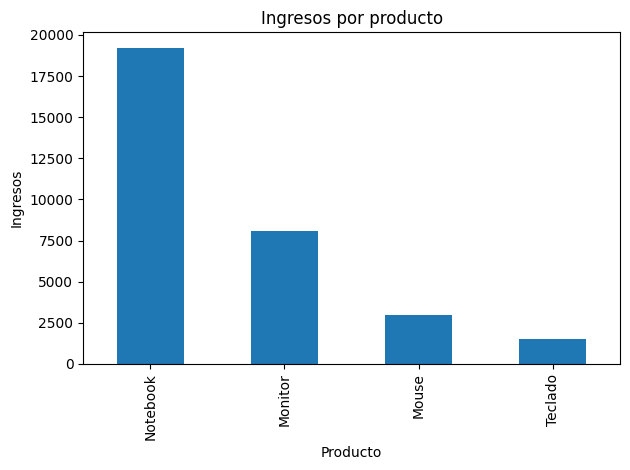

In [59]:
ingresos_por_producto.plot(
    kind="bar",
    title="Ingresos por producto"
)

plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()


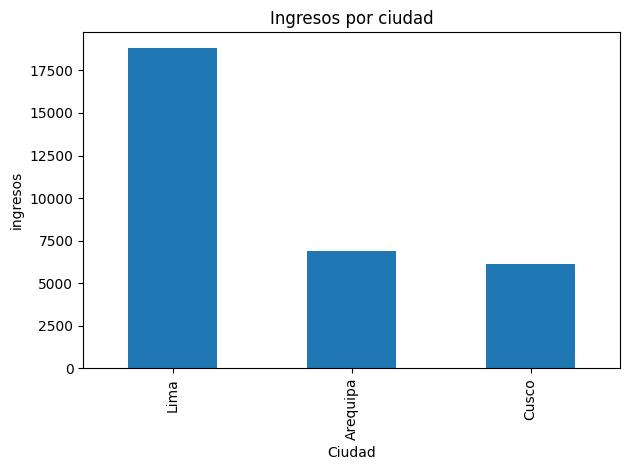

In [60]:
ingresos_por_ciudad.plot(
    kind="bar",
    title="Ingresos por ciudad"
)

plt.ylabel("ingresos")
plt.tight_layout()
plt.show()


In [61]:
df["Margen"] = df["Precio"] - df["Costo"]


In [62]:
margen_por_producto = (
    df.groupby("Producto")["Margen"]
    .sum()
    .sort_values(ascending=False)
)

margen_por_producto

Producto
Notebook    1400
Monitor      750
Mouse         60
Teclado       60
Name: Margen, dtype: int64

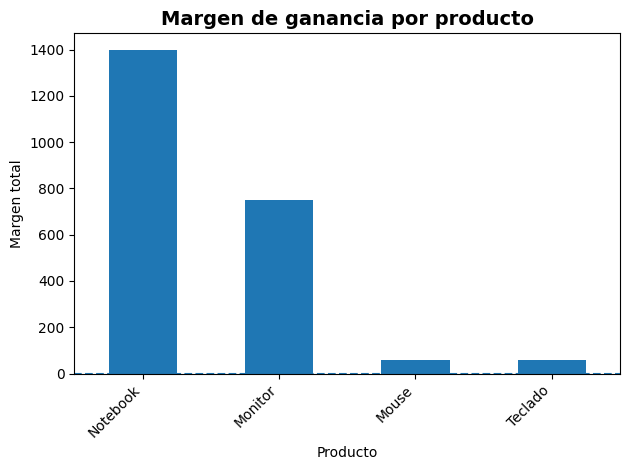

In [63]:
ax = margen_por_producto.plot(kind="bar")

ax.set_title("Margen de ganancia por producto", fontsize=14, fontweight="bold")
ax.set_ylabel("Margen total")
ax.set_xlabel("Producto")

plt.xticks(rotation=45, ha="right")
plt.axhline(0, linestyle="--") # línea de margen cero
plt.tight_layout()
plt.show()


## Conclusiones

- Notebook es el producto con mayores ingresos y mayor margen.
- Existen productos con margen bajo o cercano a cero que deberían revisarse.
- Arequipa y Cusco concentran la mayor parte de los ingresos.
- Las ventas muestran una variación mensual clara.


In [64]:
resumen_final = (
    df.groupby("Producto")
    .agg(
        Cantidad_total=("Cantidad", "sum"),
        Precio_promedio=("Precio", "mean"),
        Ingresos_totales=("Total", "sum"),
        Margen_total=("Margen", "sum")
    )
    .sort_values(by="Ingresos_totales", ascending=False)
)

resumen_final

,Cantidad_total,Precio_promedio,Ingresos_totales,Margen_total
Producto,,,,
Notebook,16,1200.0,19200,1400
Monitor,9,900.0,8100,750
Mouse,75,40.0,3000,60
Teclado,25,60.0,1500,60


In [65]:
from pathlib import Path

# Asegurarnos de que exista la carpeta output
Path("output").mkdir(exist_ok=True)

output_file = "../output/reporte_ventas.xlsx"

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Datos_limpios", index=False)
    resumen_final.to_excel(writer, sheet_name="Resumen_por_producto")
    ingresos_por_ciudad.to_frame(name="Ingresos").to_excel(
        writer, sheet_name="Ingresos_por_ciudad"
    )

output_file


'../output/reporte_ventas.xlsx'